#### Run this cell to connect to your GIS and get started:

In [ ]:
from arcgis.gis import GIS
gis = GIS("home")

# How can GIS support sustainable windfarm planning in rural Scotland?

* **Authors:** [Your Name]

* **Student ID:** 210018408

* **Date:** 14 December (extension)

**Abstract:**

Onshore wind energy plays an important role in the UK’s energy mix. However, there is debate over whether it should be built on peatland. The results from this study determine through use of GIS, the relative areas in which wind farms can be situated in the Scottish Highlands. Peatland is an important part of this spatial area. Yet, questions remain over why peatland is ever allowed to host wind farms.

**Keywords:** Wind farm, Land Use, Planning, Peatland, Scottish Highlands.

# GitHub Repository
- **GitHub Link:** https://github.com/mdorrat/GG3209-_Final_Assignment.git

## Declaration

> In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced.


## Introduction

The environment needs to be protected, all while electricity generation is striving to become carbon free. Although, major challenges remain. One of these includes the conflict between developing renewable energy and protecting precious carbon sinks. Almost half of all Scottish wind farms are built on peatland (John Muir Trust, 2024). This is very controversial as peatland collectively stores twice as much carbon as all the world’s forests (UNEP, 2019). This report will aim to investigate suitable areas for the development of onshore wind farms in the Highland local authority in Scotland. This will be conducted through the medium of Geographic Information Systems (GIS) using open-source data. Overall, the focus will try to answer the research question: How can GIS support sustainable windfarm planning in rural Scotland?

## Methodology

The key parts of this report are based on the limiting factors which control where a windfarm can be sited. There is a plethora of rules, regulations and general planning guidance to adhere to (Scottish Natural Heritage (SNH), 2017). Following this, several data sources were collected and sampled. Eventually individual planning constraints began to emerge. These included locations that had to be spared from wind farm development. These exclusion areas included places such as forest and bodies of water, as well as protected areas and world heritage sites (SNH, 2024a). Other tasks involved the creation of proximity maps to evaluate distances between potential wind farms and objects such as public roads and national grid infrastructure. One example is overhead power cables. The power cables that are referred to here, are overhead national distribution lines carrying electricity away from windfarm substations and not those connecting individual turbines to a substation. All cables within the boundary of a windfarm are located underground (Scottish Government. Planning and architecture., 2014).

The data was made up of vectors and rasters. These file formats are useful at displaying spatial information.
To begin with a shapefile vector polygon of every Scottish local authority was added to QGIS (Scottish Government, 2019). As the Scottish Highlands was the sole focus of the study, the map was clipped to the highland boundary extent. This clipping process was repeated for all datasets.
Shapefiles of public roads and built-up areas were sourced from the Ordnance Survey open data portal (OS, 2024a; OS, 2024b). Power line data was sourced from Scottish and Southern Energy’s Transmission department open data portal (2024a; 2024b).
Factorized constraints used on the map included buffers between wind turbines and roads, power lines and residential areas. Regarding the road network, UK government guidance advised a minimal horizontal separation distance by combining turbine height plus 50 metres (Great Britain. Department for Transport, 2022). Given that the tallest onshore turbines operating in Scotland are 150 metres, a 200-metre buffer was chosen. Power line separation distances were also determined using the vertical turbine height; however, guidance only required an additional tenth of the height added to the tip (National Grid Plc, 2016). This resulted in a buffer of 165 metres. Finally, the Scottish Government’s planning guidelines advised that any wind farm must be sited at least two kilometres away from urban areas (Scottish Government. Planning and architecture., 2014).
When researching protected areas, it was discovered that there are multiple different types of protected area. In this study, protected area shapefiles were merged into one vector and named appropriately. The merged file was made up of 4 different designations of protected land, namely: UNESCO World Heritage Sites, Protected areas, National Scenic Areas and areas designated as Wild Land (Scottish Government.,1998; SNH, 2014; 2024a; 2024b;).
Further vector shapefiles used in the report included landcover classifications, wind farm sites and the Scottish government’s windfarm peatland map (SNH, 2016; 2023; 2024c). A selection of land classifications was used to collectively exclude land areas consisting of bodies of water, forest and arable land. While the windfarm shapefile was incorporated to exclude areas where wind farms were already sited or under consideration. The peatland wind farm map was first produced to aid planners to determine where the most pristine areas of healthy, deep peat lie. 
However, the presence of deep peat is by no means a barrier to development. The biggest barrier to wind development on peat, is whether the overall carbon savings of power production outweighs the potential carbon emissions from construction. This largely rests upon a carbon calculator developed by Professor Jo Smith on behalf of the Scottish Government. It is important to note that any decision on windfarm siting on peatland also requires detailed environmental impact assessments, however there is no existing legislation that bans wind farm construction on Scottish peatland.
Raster data imported to QGIS included a windspeed map at 150 metres elevation, and a digital elevation model of Scotland (Global Wind Atlas, 2024; Moodle, 2024). Windspeeds were constrained to be greater than 6 and less than 12 metres per second. This range addressed the maximum power generating wind speed, and the speed for the greatest power efficiency (National Grid Plc, 2024). Elevation was limited to below 10% following guidance on windfarm planning according to Blue Marble
Once all the data were sourced, the process of creating normalised proximity and constraint maps commenced. This first step involved converting vectors to rasters. Distances were quantified using the proximity tool, while different distance proximities were normalized using the following function in raster calculator: F(x) = K*x+n.
Once the raster calculations were completed, the specific constraints and limiting factors were labelled (Table.1.).




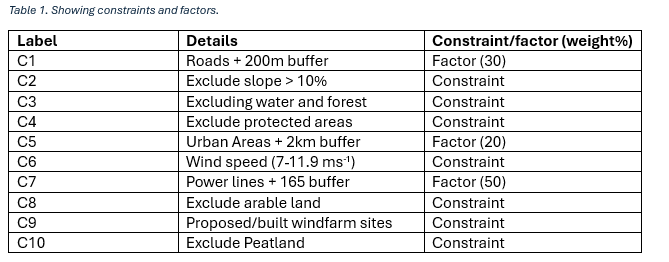

Three of the variables were limited by proximity to certain areas. These are known as factors and are weighted. The weights were chosen to reflect their importance to the planning purposes. Firstly, access to electricity is paramount, power lines were given a 50% weighting. The closer a site is to the national distribution network the better. Shorter distances save money on building additional power lines. This weight was followed by roads at 30%. This proximity helps to save money on road construction and further environmental degradation; however, new access tracks are always going to be a part of the wind turbine development. Finally, proximity to urban areas took up the last 20% weighting. It is important to consider where the energy is needed, and the windiest areas are often furthest from the biggest cities. However, it is important to aim for supply sites as being as close to the demand areas as possible. This can save any potential energy loss over long transmission distances.
The weighted factors were calculated in raster calculator along with the constraints to produce a suitability map. While unable to make use of the official carbon calculator, to assess the potential for wind on peatland, a second suitability map was created but with C10 removed. This way, peatland was effectively included as a suitable area for development. The two maps were also differenced to create a change map.
Finally, the areas of the suitability rasters were determined using the QGIS tool: Raster layer unique values report.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import rasterio as rio
from rasterio import plot
from rasterio.plot import show

In [3]:
dataset = '/arcgis/home/Assignment_3/Suitability_map_including_peat.tif'

In [3]:
import rasterio
from rasterio.plot import show
import numpy as np

path = "/arcgis/home/Assignment_3/Suitability_map_including_peat.tif"

with rasterio.open(path) as image:
    image_array = image.read()


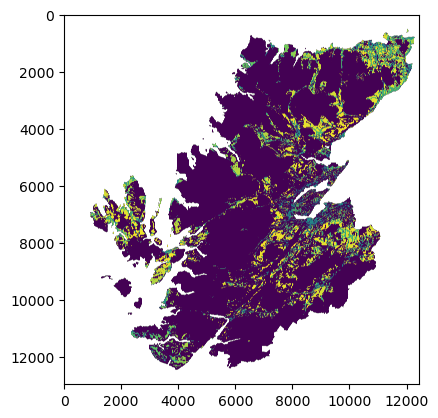

<AxesSubplot: >

In [4]:
show(image_array)

In [1]:
dataset = '/arcgis/home/Assignment_3/Suitability_excluding_peat.tif'

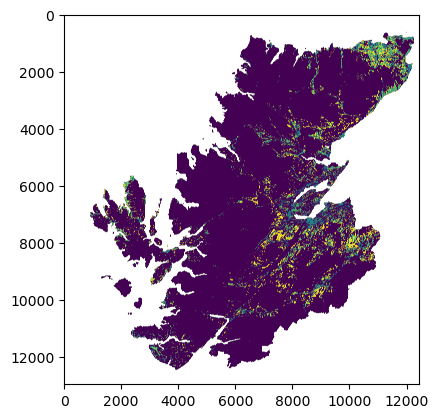

<AxesSubplot: >

In [3]:
show(image_array)

In [ ]:
dataset = '/arcgis/home/Assignment_3/Change_map.tif'

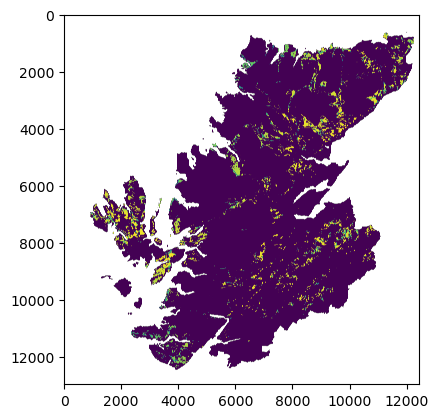

<AxesSubplot: >

In [2]:
show(image_array)

## Results

The results were produced following the creation of suitability maps. See code lines. The yellow areas represent the most suitable sites while navy blue indicates land that is wholly unsuitable. When peatland is included as a suitable building location, the area of potential sites covers 18 percent of the highlands compared with only 11 percent if it is excluded (Table.2.). The difference in suitable area can be more clearly observed in figures 1 and 2.
The 3rd raster image illustrates the change in suitable area between the two maps, highlighting peatland in green and yellow. The Area of land potentially available for development on peatland is around 1935 kilometres (table.3.).


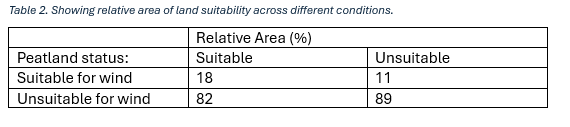

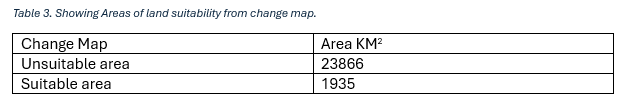

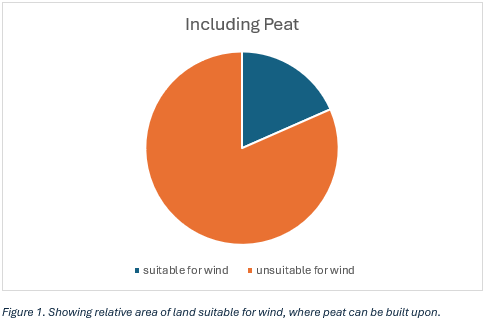

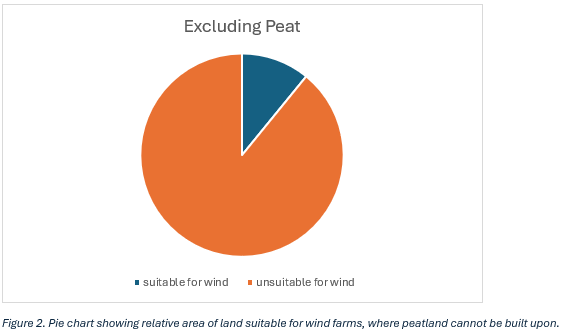

## Discussion

This study focusses solely on the Scottish Highlands, however there is plenty of space in which to build more wind farms. This is backed up by Shepherd et al., who identified the highland as one of the few areas in Scotland with vast areas of land that is not just limited by peatland (2021). However, peatland still makes up a sizeable portion of the highlands. Especially as it is home to Scotland’s only peatland UNESCO World Heritage site. It is unfortunate though, that vast areas of peatland still lack the protection they deserve. 
Furthermore, in a time when the UK has got rid of coal power stations, the wisdom of continuing to allow windfarms to be built on peatland appears to be seriously impaired. Even the professor who developed the all important peatland calculator, believes otherwise (Smith, Nayak, and Smith, 2012; 2014 ).
While it is important to build a windfarm as close as possible to the grid supply, there remain issues that need to be addressed. One of these is the capacity factor. The UK energy grid is not capable of distributing electricity to every part of the country. A bottleneck exists between Scotland and England, preventing Scottish wind energy from flowing south during peak times. This limitation forces the shutdown of productive windfarms and results in constraint payments that have totalled over one billion pounds in 2024 alone (Mathis, 2024). While this may seem unfair from the bill payer’s point of view, the constraint payments still make wind farm developments feasible and financially.
Looking back at the data, two limitations were found. When selecting data, it was difficult to find a DEM. The Scottish DEM file used in this report was sourced from the lab data folder in the week 3 section on Moodle (Moodle, 2024). Additionally, there was confusion around the area figures produced from the suitability maps. Overall, it was useful to get a quantitative understanding of the proportions of suitable and unsuitable land, however the data first needed to be sorted. The QGIS area tool produced data across thousands of rows. The area of unsuitable land was clear to spot as it was a large value and occupied the first row on QGIS, leaving the remaining rows to be added together, forming the suitable area. However, the total areas of each map and the change map, had minor differences, despite covering the same area (see table.3. in appendix). Perhaps the presence and absence of the additional peatland raster had an unforeseen impact. This should be closely monitored in any repetitions of the study.




## Conclusion

Overall, the QGIS programme was highly capable of not only displaying a broad range of complex data but processing it as well. Thanks to the methods employed, a rough suitability map has been created, enabling observers to view the most and least suitable sites for potential future wind farms across the Highland local authority area. GIS has been able to provide a means by which windfarm planning can be scrutinised from a remote perspective. There remain, significant issues regarding the wisdom of continuing to allow wind farm development on peatland. It is a stretch to call this sustainable. Although, tools such as QGIS have enabled peat, which is often left out of sight and mind, to become relevant and better understood. It covers an immense area. This way, more can be done to work towards proper peatland protection.

## Appendix

Include any additional information and code not included in the main body of the paper but may be necessary. This could include:

* Raw data tables
* Additional figures or tables
* 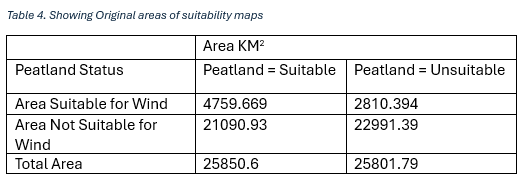
* Supporting code


## References

Data:

All data used with the following permission:
Spatialdata.Gov.Scot Metadata Portal Documentation, Scottish Government and Astun Technology, 2024, licensed under the Open Government Licence www.nationalarchives.gov.uk/doc/open-government-licence.

References:

Blue Marble Geographics (2024). Wind Farm Placement. Available at: https://www.bluemarblegeo.com/industry-showcases/wind-farm-placement/#:~:text=Slope%20Analysis,acceptable%20to%20support%20wind%20turbines. (Accessed: 10 December 2024).
Global Wind Atlas (2024). ‘Mean Wind Speed. Available at: https://globalwindatlas.info/en/download/gis-files (Accessed: 23 November 2024).
Great Britain. Department for Transport. (2022). Guidance Strategic road network and the delivery of sustainable development. Available at: https://www.gov.uk/government/publications/strategic-road-network-and-the-delivery-of-sustainable-development/strategic-road-network-and-the-delivery-of-sustainable-development (Accessed: 10 December 2024). 
John Muir Trust (2024). Submission to the Local Government, Planning and Housing Committee: Building huge windfarms on peatlands isn’t going to help Scotland fulfil its net zero targets, protecting and restoring peatlands will. Available at: https://www.parliament.scot/-/media/files/committees/local-gov/correspondence/2024/npf4reviewjohnmuirtrust.pdf#page=0.86 (Accessed: 28 November).
Mathis, W. (2024). ‘UK Is Paying £1 Billion to Waste a Record Amount of Wind Power’, Bloomberg, 2 December. Available at: https://finance.yahoo.com/news/uk-paying-1-billion-waste-063000837.html (Accessed: 11 December 2024).
Moodle. (2024). Scotland_DEM_500m. Available at: https://moody.st-andrews.ac.uk/moodle/mod/resource/view.php?id=1205922b  (Accessed: 14 December 2024).
National Grid Plc (2016). Third-party guidance for working near National Grid Electricity Transmission equipment. Available at: https://www.nationalgrid.com/sites/default/files/documents/8589935533-TGN%20287_Third%20party%20guidance%20for%20working%20near%20NGET%20equipment.pdf#page=12.47 (Accessed: 10 December 2024). 
National Grid Plc (2024). Wind power: your questions answered. Available at: https://www.nationalgrid.com/stories/energy-explained/wind-power-questions-answered#:~:text=Wind%20turbines%20will%20generally%20operate,56mph%20(90km%2Fh). (Accessed: 10 December 2024).  
Ordnance Survey (2024a). ‘OS Open Built Up Areas’. Available at: https://osdatahub.os.uk/downloads/open/BuiltUpAreas (Accessed: 23 November 2024).
Ordnance Survey (2024b). ‘OS Open Roads’. Available at: https://osdatahub.os.uk/downloads/open/OpenRoads (Accessed: 23 November 2024).
Scottish Government. (1998). ‘National Scenic Areas – Scotland’. Available at: https://spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/metadata/13396739-7602-4428-85fd-95a5d7e208a1 (Accessed: 28 November 2024). 
Scottish Government. Planning and architecture. (2014). Onshore wind turbines: planning advice. Edinburgh: The Scottish Government. Available at: https://www.gov.scot/publications/onshore-wind-turbines-planning-advice/ (Accessed: 23 November 2024).
Scottish Government. (2019). ‘Local Authority boundaries – Scotland’. Available at: https://www.spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/metadata/890afb85-01d2-443e-be33-f3c490c02a18 (Accessed: 23 November 2024).
Scottish Natural Heritage (2014). ‘Wild Land Areas 2014’. Available at: https://spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/metadata/5EC05169-A749-433A-B1CF-0185F81E28DF (Accessed: 28 November 2024).
Scottish Natural Heritage (2016). ‘Carbon and Peatland 2016 map’. Available at: https://www.spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/metadata/51b36efb-3521-4243-9bb0-93f8a7a60a71 (Accessed: 23 November 2024).
Scottish Natural Heritage (2017). Siting and Designing Wind Farms in the Landscape Guidance. Available at: https://www.nature.scot/sites/default/files/2017-11/Siting%20and%20designing%20windfarms%20in%20the%20landscape%20-%20version%203a.pdf (Accessed: 28 November 2024).
Scottish Natural Heritage (2023). ‘Scotland Habitat and Land Cover Map – 2022’. Available at: https://www.spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/metadata/8462f345-6e9c-45de-b1d2-665a55b9d74a (Accessed: 23 November 2024).
Scottish Natural Heritage (2024a). ‘UNESCO World Heritage Sites (Scotland)’. Available at: https://spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/metadata/9DB7C41B-6FD4-4C19-AFEA-1DCE27127593 (Accessed: 28 November 2024).
Scottish Natural Heritage (2024b). ‘30 x 30 Protected Areas’. Available at: https://www.spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/metadata/54dd8483-899c-4517-8278-da520cb3eefb (Accessed: 23 November 2024).
Scottish Natural Heritage (2024c). ‘Wind Farm Proposals Scotland’. Available at: https://www.spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/metadata/b57cabf0-0551-4c57-ae39-d32720e22ab6 (Accessed: 23 November 2024).
Shepherd, A., et al. (2021). ‘Scotland’s onshore wind energy generation, impact on natural capital & satisfying no-nuclear energy policy’, Energy Reports, 7, pp. 7106-7117. Available at: https://doi.org/10.1016/j.egyr.2021.10.063 (Accessed: 14 December 2024).
Smith, J., Nayak, D., and Smith, P. (2012). ‘Avoid constructing wind farms on peat’. Nature 489, p. 33. Available at: https://doi.org/10.1038/489033d (Accessed: 10 December 2024).
Smith, J., Nayak, D., and Smith, P. (2014). ‘Wind farms on undegraded peatlands are unlikely to reduce future carbon emissions’, Energy Policy, 66, pp. 585-591. Available at: https://doi.org/10.1016/j.enpol.2013.10.066 (Accessed: 14 December 2024).  
Scottish and Southern Energy Networks, Transmission (2024a). ‘SSEN Transmission Overhead Line Grid Shapefile’. Available at: https://ssentransmission.opendatasoft.com/explore/dataset/overhead-line-grid/information/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Im92ZXJoZWFkLWxpbmUtZ3JpZCIsIm9wdGlvbnMiOnt9fSwiY2hhcnRzIjpbeyJhbGlnbk1vbnRoIjp0cnVlLCJ0eXBlIjoiY29sdW1uIiwiZnVuYyI6IkFWRyIsInlBeGlzIjoidm9sdGFnZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDQ2ODcifV0sInhBeGlzIjoidm9sdGFnZSIsIm1heHBvaW50cyI6NTAsInNvcnQiOiIifV0sInRpbWVzY2FsZSI6IiIsImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWV9&location=7,57.10944,-4.32694&basemap=jawg.streets (Accessed: 23 November 2024).
Scottish and Southern Energy Networks, Transmission (2024b). ‘SSEN Transmission Overhead Line Supergrid Shapefile’. Available at: https://ssentransmission.opendatasoft.com/explore/dataset/overhead-line-supergrid/information/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Im92ZXJoZWFkLWxpbmUtc3VwZXJncmlkIiwib3B0aW9ucyI6e319LCJjaGFydHMiOlt7ImFsaWduTW9udGgiOnRydWUsInR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJ2b2x0YWdlIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiIzAwNDY4NyJ9XSwieEF4aXMiOiJ2b2x0YWdlIiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=8,57.84037,-2.23846&basemap=jawg.streets (Accessed: 23 November 2024).
United Nations Environment Programme (2019). Peatlands store twice as much carbon as all the world’s forests. Available at: https://www.unep.org/news-and-stories/story/peatlands-store-twice-much-carbon-all-worlds-forests#:~:text=Peatlands%20are%20a%20type%20of,%E2%80%9CWetlands%20and%20climate%20change%E2%80%9D. (Accessed: 10 December 2024).
